# Importing libraries

In [176]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api

# Getting data

In [177]:
# Entering the league's  link
link = "https://understat.com/league/Serie_A/2022"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

# Geting the data 
strings = scripts[2].string 

# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [178]:
data

{'94': {'id': '94',
  'title': 'Verona',
  'history': [{'h_a': 'h',
    'xG': 1.13087,
    'xGA': 2.79803,
    'npxG': 1.13087,
    'npxGA': 2.79803,
    'ppda': {'att': 301, 'def': 24},
    'ppda_allowed': {'att': 136, 'def': 16},
    'deep': 3,
    'deep_allowed': 17,
    'scored': 2,
    'missed': 5,
    'xpts': 0.4179,
    'result': 'l',
    'date': '2022-08-15 16:30:00',
    'wins': 0,
    'draws': 0,
    'loses': 1,
    'pts': 0,
    'npxGD': -1.6671599999999998},
   {'h_a': 'a',
    'xG': 2.46808,
    'xGA': 1.13475,
    'npxG': 2.46808,
    'npxGA': 1.13475,
    'ppda': {'att': 166, 'def': 27},
    'ppda_allowed': {'att': 139, 'def': 16},
    'deep': 4,
    'deep_allowed': 4,
    'scored': 1,
    'missed': 1,
    'xpts': 2.3346999999999998,
    'result': 'd',
    'date': '2022-08-21 18:45:00',
    'wins': 0,
    'draws': 1,
    'loses': 0,
    'pts': 1,
    'npxGD': 1.3333300000000001},
   {'h_a': 'h',
    'xG': 0.369511,
    'xGA': 0.843159,
    'npxG': 0.369511,
    'npxGA': 

# Extracting xG and Goals

In [179]:
# Extracting xG and Goals

teams_xg = []
teams_g = []

for i in data:

    for team in data[i]['history']:
        teams_xg.append(team['xG'])
        teams_g.append(team['scored'])

In [180]:
# Checking their lenght

len(teams_xg), len(teams_g)

(760, 760)

# Checking basic stats

In [181]:
# Checking averages

print('Avg xG:    ' + str(sum(teams_xg)/len(teams_xg)))
print('Avg goals: ' + str(sum(teams_g)/len(teams_g)))

Avg xG:    1.3273025689473668
Avg goals: 1.2815789473684212


In [182]:
# Checking correlation between them

corr, _ = stats.pearsonr(teams_xg, teams_g)
corr

0.5778127914300437

# Building Regression Model

In [183]:
# Merging xG and G to a list
merged_list = list(zip(teams_xg, teams_g))

# Transforming the list to a DataFrame
merged_list = pd.DataFrame(merged_list)

# Naming columns
merged_list.columns = ['xG','G']

# Checking what we got
merged_list.head()

,xG,G
0,1.130870,2
1,2.468080,1
2,0.369511,0
3,0.589249,1
4,2.343300,2


In [184]:
# Writing OLS formula

ols_formula = "G ~ xG"

In [185]:
# Creating OLS object and fit the model

OLS = ols(formula = ols_formula, data = merged_list)
model = OLS.fit()

In [186]:
# Geting model results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     379.9
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           6.74e-69
Time:                        15:46:50   Log-Likelihood:                -1027.4
No. Observations:                 760   AIC:                             2059.
Df Residuals:                     758   BIC:                             2068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2086      0.065      3.225      0.001       0.082       0.336
xG             0.8084      0.041     19.491      0.000       0.727       0.890
==============================================================================
Omnibus:                       91.413   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.565
Skew:                           0.771   Prob(JB):                     6.10e-35
Kurtosis:                       4.612   Cond. No.                         3.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualizing

[Text(0.5, 1.0, 'Goals vs xG in Serie A 2022/2023')]

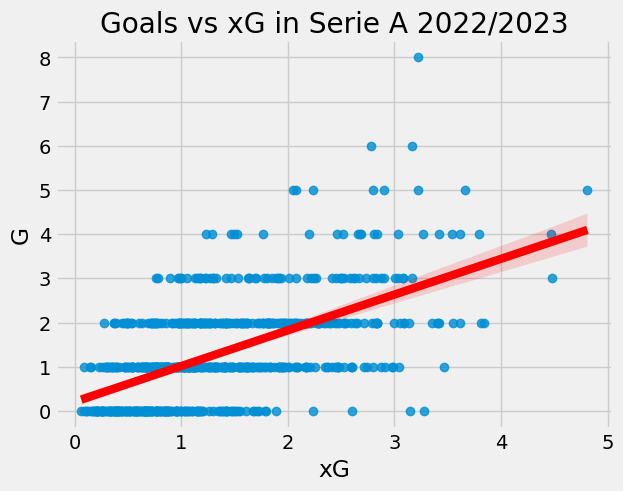

In [187]:
# Plotting them

sns.regplot(x = 'xG', y = 'G', data = merged_list, line_kws=dict(color="r")).set(title='Goals vs xG in Serie A 2022/2023')

# Doing the same on a club level

In [188]:
# Creating the dataframe
df =  pd.DataFrame(data)

# Checking
df.head()

,94,95,96,97,98,99,102,104,105,106,107,108,110,111,113,243,260,264,271,272
id,94,95,96,97,98,99,102,104,105,106,107,108,110,111,113,243,260,264,271,272
title,Verona,Roma,Lazio,Bologna,Juventus,Udinese,Sampdoria,Sassuolo,Napoli,Inter,Atalanta,Empoli,Fiorentina,AC Milan,Torino,Lecce,Spezia,Salernitana,Monza,Cremonese
history,"[{'h_a': 'h', 'xG': 1.13087, 'xGA': 2.79803, '...","[{'h_a': 'a', 'xG': 2.98256, 'xGA': 0.505094, ...","[{'h_a': 'h', 'xG': 0.709672, 'xGA': 1.59632, ...","[{'h_a': 'a', 'xG': 1.59632, 'xGA': 0.709672, ...","[{'h_a': 'h', 'xG': 2.24204, 'xGA': 0.878583, ...","[{'h_a': 'a', 'xG': 0.439661, 'xGA': 2.68095, ...","[{'h_a': 'h', 'xG': 0.617683, 'xGA': 2.28675, ...","[{'h_a': 'a', 'xG': 0.878583, 'xGA': 2.24204, ...","[{'h_a': 'a', 'xG': 2.79803, 'xGA': 1.13087, '...","[{'h_a': 'a', 'xG': 2.52817, 'xGA': 0.752988, ...","[{'h_a': 'a', 'xG': 2.28675, 'xGA': 0.617683, ...","[{'h_a': 'a', 'xG': 0.987781, 'xGA': 0.861875,...","[{'h_a': 'h', 'xG': 2.01254, 'xGA': 1.76638, '...","[{'h_a': 'h', 'xG': 2.68095, 'xGA': 0.439661, ...","[{'h_a': 'a', 'xG': 3.13646, 'xGA': 1.0301, 'n...","[{'h_a': 'h', 'xG': 0.752988, 'xGA': 2.52817, ...","[{'h_a': 'h', 'xG': 0.861875, 'xGA': 0.987781,...","[{'h_a': 'h', 'xG': 0.505094, 'xGA': 2.98256, ...","[{'h_a': 'h', 'xG': 1.0301, 'xGA': 3.13646, 'n...","[{'h_a': 'a', 'xG': 1.76638, 'xGA': 2.01254, '..."


In [189]:
# Creating the club's  DataFrame
df_juventus =  pd.DataFrame(data['98']['history'])

# Selecting few columns 
df_juventus = df_juventus[['h_a','xG','scored']]

# Creating a new column wth a matchday number
df_juventus['Match'] = np.arange(1,39)

# Creating a new column with Goals and xG difference
df_juventus['G_xG_Diff'] = df_juventus['scored'] - df_juventus['xG']

In [190]:
df_juventus

,h_a,xG,scored,Match,G_xG_Diff
0,h,2.242040,3,1,0.757960
1,a,0.807606,0,2,-0.807606
2,h,0.633345,1,3,0.366655
3,h,1.765030,2,4,0.234970
4,a,1.075220,1,5,-0.075220
5,h,1.839290,2,6,0.160710
6,a,1.205180,0,7,-1.205180
7,h,2.511620,3,8,0.488380
8,a,0.673421,0,9,-0.673421
9,a,2.343350,1,10,-1.343350


In [191]:
print('Average difference:')
sum(df_juventus['G_xG_Diff'])/len(df_juventus['G_xG_Diff'])

Average difference:


-0.0984723947368421

In [192]:
df_juventus_h = df_juventus[df_juventus['h_a'] == 'h']
df_juventus_a = df_juventus[df_juventus['h_a'] == 'a']
df_juventus_h

,h_a,xG,scored,Match,G_xG_Diff
0,h,2.242040,3,1,0.757960
2,h,0.633345,1,3,0.366655
3,h,1.765030,2,4,0.234970
5,h,1.839290,2,6,0.160710
7,h,2.511620,3,8,0.488380
10,h,3.789860,4,11,0.210140
12,h,1.554870,2,13,0.445130
14,h,1.702690,3,15,1.297310
16,h,2.593040,1,17,-1.593040
18,h,1.918090,3,19,1.081910


In [193]:
# Checking averages for home games

print('Avg xG:    ' + str(sum(df_juventus_h['xG'])/len(df_juventus_h['xG'])))
print('Avg goals: ' + str(sum(df_juventus_h['scored'])/len(df_juventus_h['scored'])))

Avg xG:    1.7777542631578946
Avg goals: 2.0


In [194]:
# Checking averages for away games

print('Avg xG:    ' + str(sum(df_juventus_a['xG'])/len(df_juventus_a['xG'])))
print('Avg goals: ' + str(sum(df_juventus_a['scored'])/len(df_juventus_a['scored'])))

Avg xG:    1.3665589473684214
Avg goals: 0.9473684210526315


In [195]:
print('Average difference in home matches:')
sum(df_juventus_h['G_xG_Diff'])/len(df_juventus_h['G_xG_Diff'])

Average difference in home matches:


0.22224573684210522

In [196]:
print('Average difference in away matches:')
sum(df_juventus_a['G_xG_Diff'])/len(df_juventus_a['G_xG_Diff'])

Average difference in away matches:


-0.41919052631578946

Text(0.5, 0.98, 'Juventus 2022/2023 Season\n')

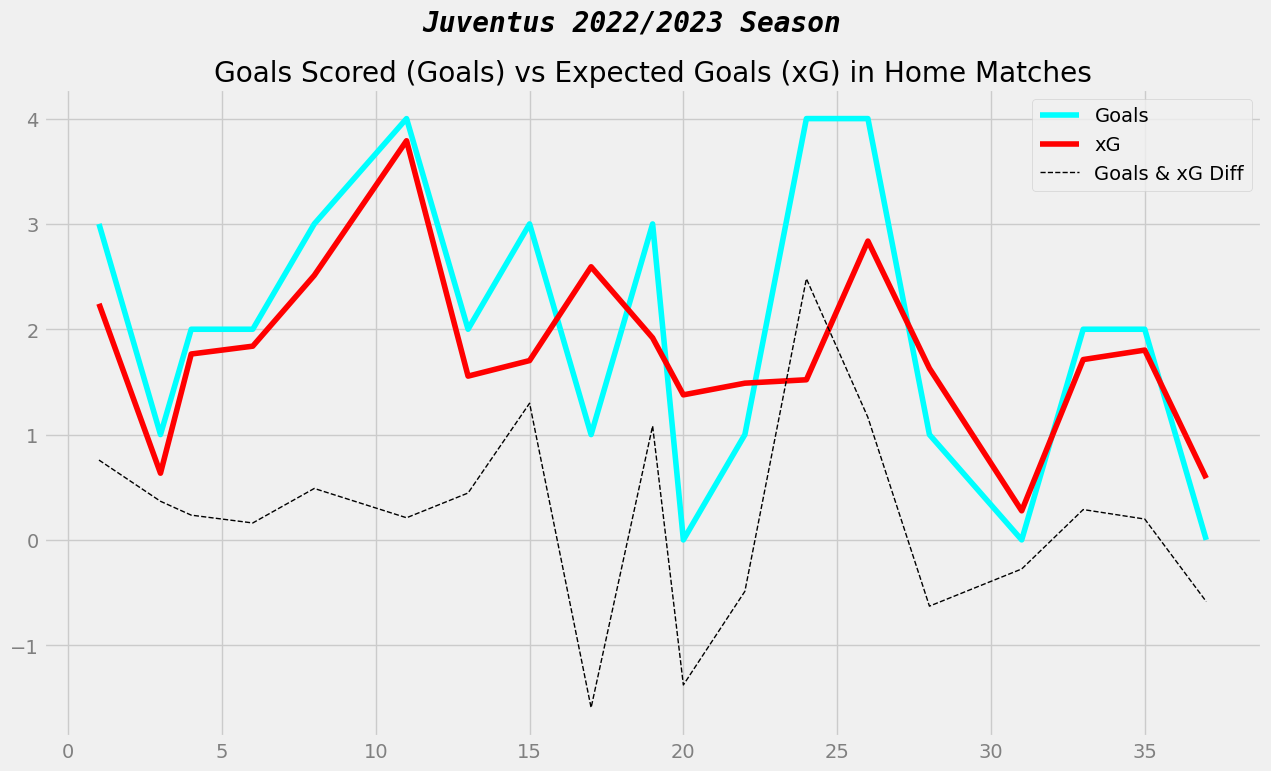

In [197]:
# Plotting style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))

# Plotting Goals and xG
ax.plot(df_juventus_h.Match,df_juventus_h.scored,label='Goals',color='cyan')
ax.plot(df_juventus_h.Match,df_juventus_h.xG,color='red',label='xG')

# Plotting G and xG Diff
ax.plot(df_juventus_h.Match,df_juventus_h.G_xG_Diff,label='Goals & xG Diff',color='black',linestyle='dashed',linewidth=1,alpha=1)

# Style for ticks
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals Scored (Goals) vs Expected Goals (xG) in Home Matches')
plt.suptitle('Juventus 2022/2023 Season\n', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

Text(0.5, 0.98, 'Juventus 2022/2023 Season\n')

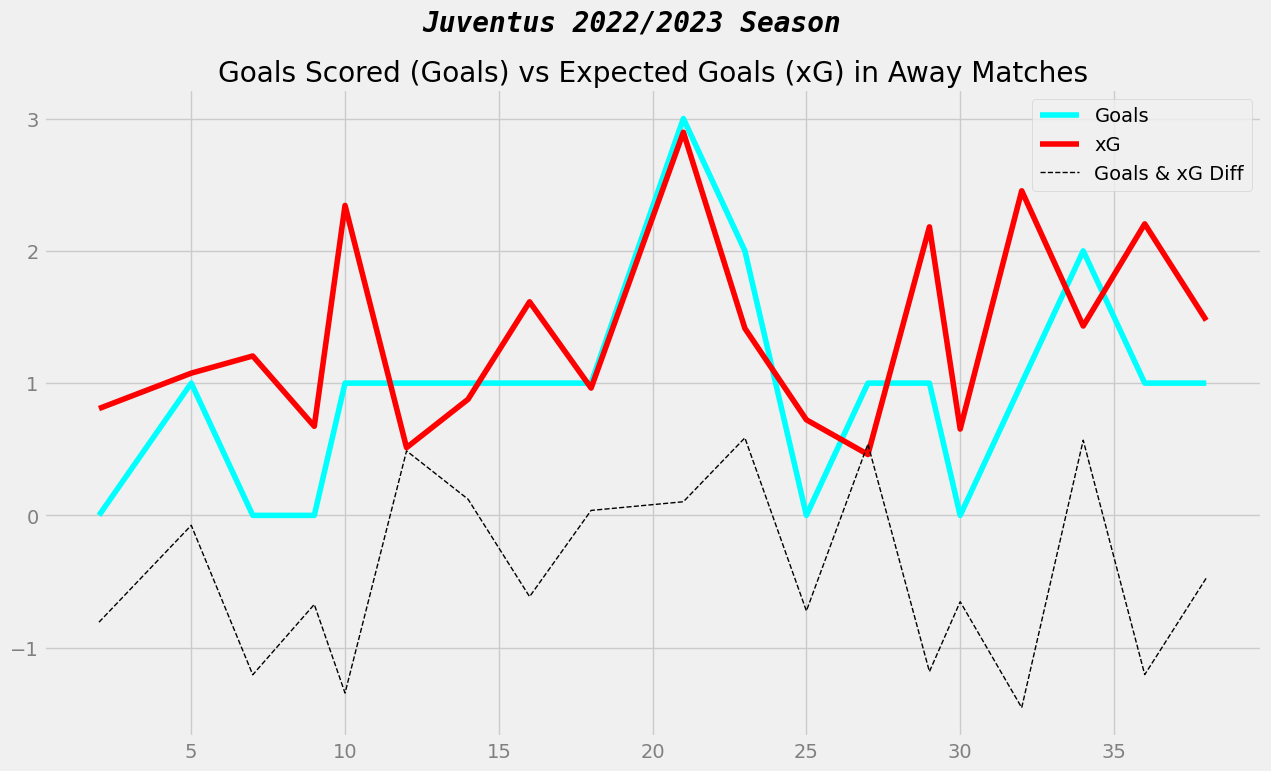

In [198]:
# Plotting style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))

# Plotting Goals and xG
ax.plot(df_juventus_a.Match,df_juventus_a.scored,label='Goals',color='cyan')
ax.plot(df_juventus_a.Match,df_juventus_a.xG,color='red',label='xG')

# Plotting G and xG Diff
ax.plot(df_juventus_a.Match,df_juventus_a.G_xG_Diff,label='Goals & xG Diff',color='black',linestyle='dashed',linewidth=1,alpha=1)

# Style for ticks
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals Scored (Goals) vs Expected Goals (xG) in Away Matches')
plt.suptitle('Juventus 2022/2023 Season\n', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

[Text(0.5, 1.0, 'Goals vs xG in Home Matches')]

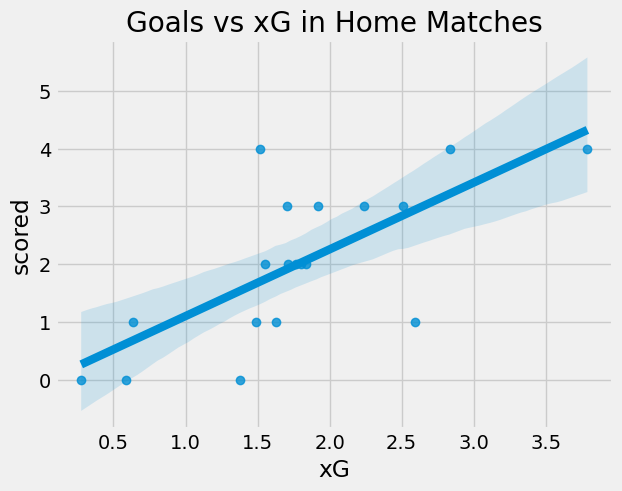

In [199]:
sns.regplot(x = "xG", y = 'scored', data = df_juventus_h).set(title='Goals vs xG in Home Matches')

[Text(0.5, 1.0, 'Goals vs xG in Away Matches')]

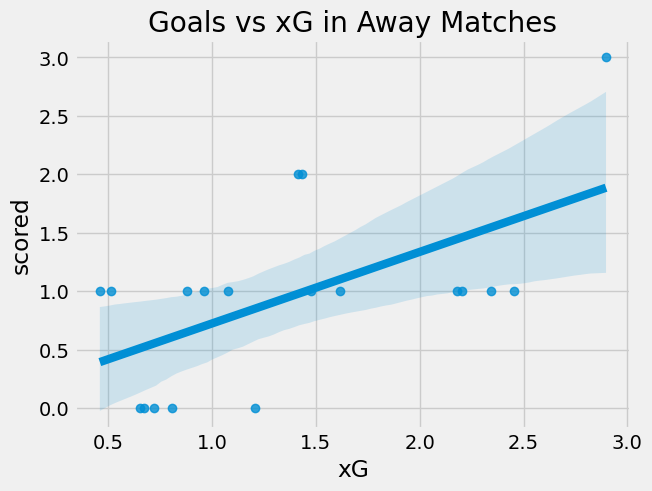

In [200]:
sns.regplot(x = "xG", y = 'scored', data = df_juventus_a).set(title='Goals vs xG in Away Matches')

In [201]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols
import statsmodels.api

# Write out OLS formula as a string
ols_formula = "scored ~ xG"

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = df_juventus_h)
model = OLS.fit()

# Get model results
model.summary()

C:\Python\test_env\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 scored   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     16.98
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           0.000714
Time:                        15:47:33   Log-Likelihood:                -25.332
No. Observations:                  19   AIC:                             54.66
Df Residuals:                      17   BIC:                             56.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0529      0.546     -0.097      0.924      -1.204       1.098
xG             1.1547      0.280      4.121      0.001       0.564       1.746
==============================================================================
Omnibus:                        2.018   Durbin-Watson:                   2.448
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                0.556
Skew:                           0.171   Prob(JB):                        0.757
Kurtosis:                       3.766   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = df_juventus_a)
model = OLS.fit()

# Get model results
model.summary()

C:\Python\test_env\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 scored   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     8.474
Date:                Sat, 11 Nov 2023   Prob (F-statistic):            0.00973
Time:                        15:47:57   Log-Likelihood:                -17.880
No. Observations:                  19   AIC:                             39.76
Df Residuals:                      17   BIC:                             41.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1102      0.325      0.340      0.738      -0.574       0.795
xG             0.6126      0.210      2.911      0.010       0.169       1.057
==============================================================================
Omnibus:                        3.281   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                1.769
Skew:                           0.472   Prob(JB):                        0.413
Kurtosis:                       1.841   Cond. No.                         4.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
# Creating the rolling/moving average columns
df_juventus['xgSMA'] = df_juventus['xG'].rolling(window=5).mean()
df_juventus['GSMA'] = df_juventus['scored'].rolling(window=5).mean()

In [204]:
df_juventus

,h_a,xG,scored,Match,G_xG_Diff,xgSMA,GSMA
0,h,2.242040,3,1,0.757960,NaN,NaN
1,a,0.807606,0,2,-0.807606,NaN,NaN
2,h,0.633345,1,3,0.366655,NaN,NaN
3,h,1.765030,2,4,0.234970,NaN,NaN
4,a,1.075220,1,5,-0.075220,1.304648,1.4
5,h,1.839290,2,6,0.160710,1.224098,1.2
6,a,1.205180,0,7,-1.205180,1.303613,1.2
7,h,2.511620,3,8,0.488380,1.679268,1.6
8,a,0.673421,0,9,-0.673421,1.460946,1.2
9,a,2.343350,1,10,-1.343350,1.714572,1.2


Text(0.5, 0.98, 'Juventus 2022/2023 Season')

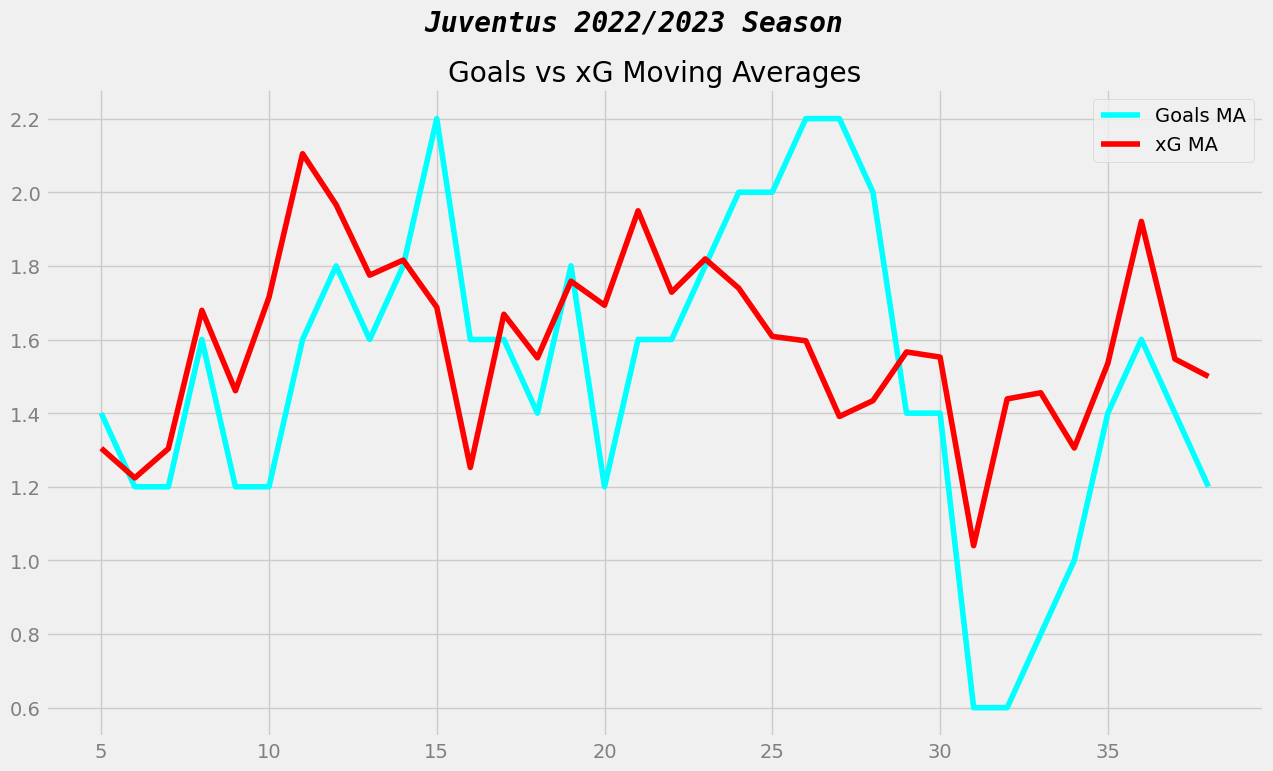

In [205]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df_juventus.Match,df_juventus.GSMA,label='Goals MA',color='cyan')
ax.plot(df_juventus.Match,df_juventus.xgSMA,label='xG MA', color='red')
#plotting G and GA
#ax.plot(df_juventus.Match,df_juventus.xG,label='xG',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
#ax.plot(df_juventus.Match,df_juventus.xGA,label='xGA',color='red',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals vs xG Moving Averages')
plt.suptitle('Juventus 2022/2023 Season', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

In [206]:
df_juventus_h = df_juventus[df_juventus['h_a'] == 'h']
df_juventus_a = df_juventus[df_juventus['h_a'] == 'a']

Text(0.5, 0.98, 'Juventus 2022/2023 Season (Home)')

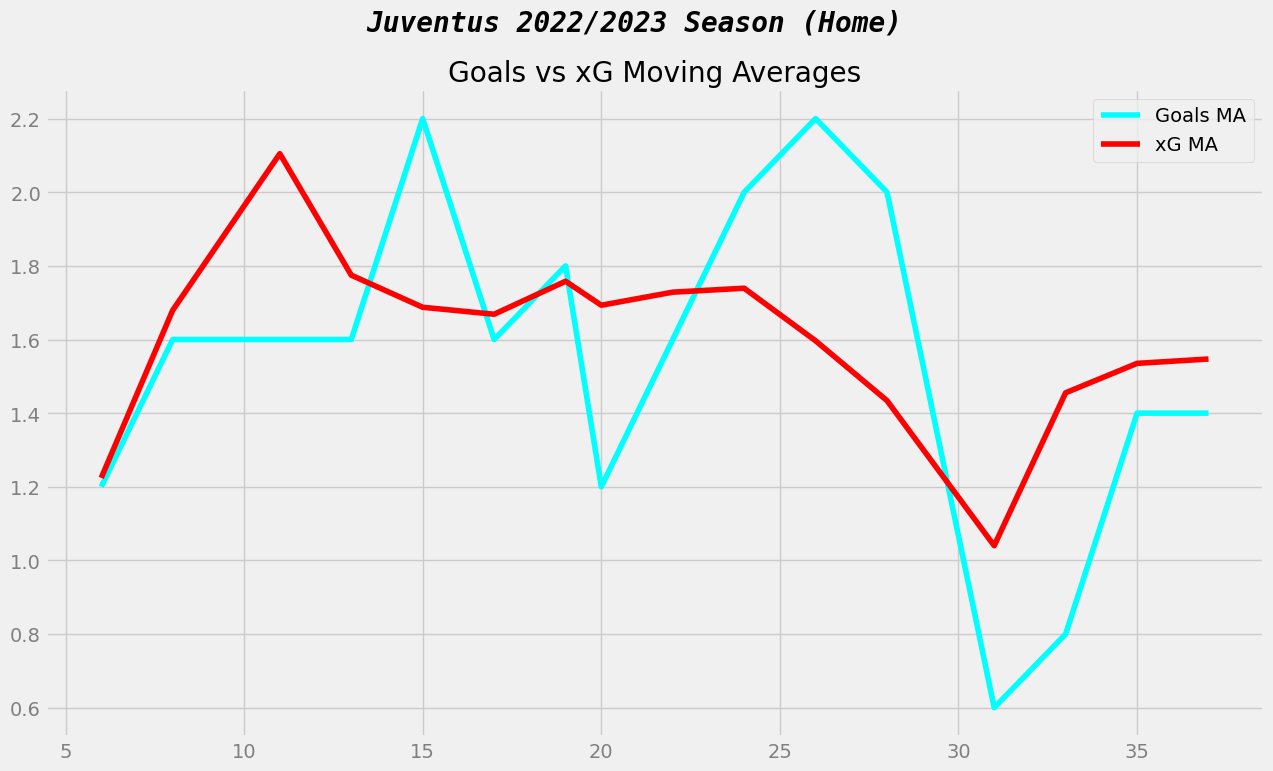

In [207]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df_juventus_h.Match,df_juventus_h.GSMA,label='Goals MA',color='cyan')
ax.plot(df_juventus_h.Match,df_juventus_h.xgSMA,label='xG MA', color='red')
#plotting G and GA
#ax.plot(df_juventus.Match,df_juventus.xG,label='xG',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
#ax.plot(df_juventus.Match,df_juventus.xGA,label='xGA',color='red',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals vs xG Moving Averages')
plt.suptitle('Juventus 2022/2023 Season (Home)', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

Text(0.5, 0.98, 'Juventus 2022/2023 Season (Away)')

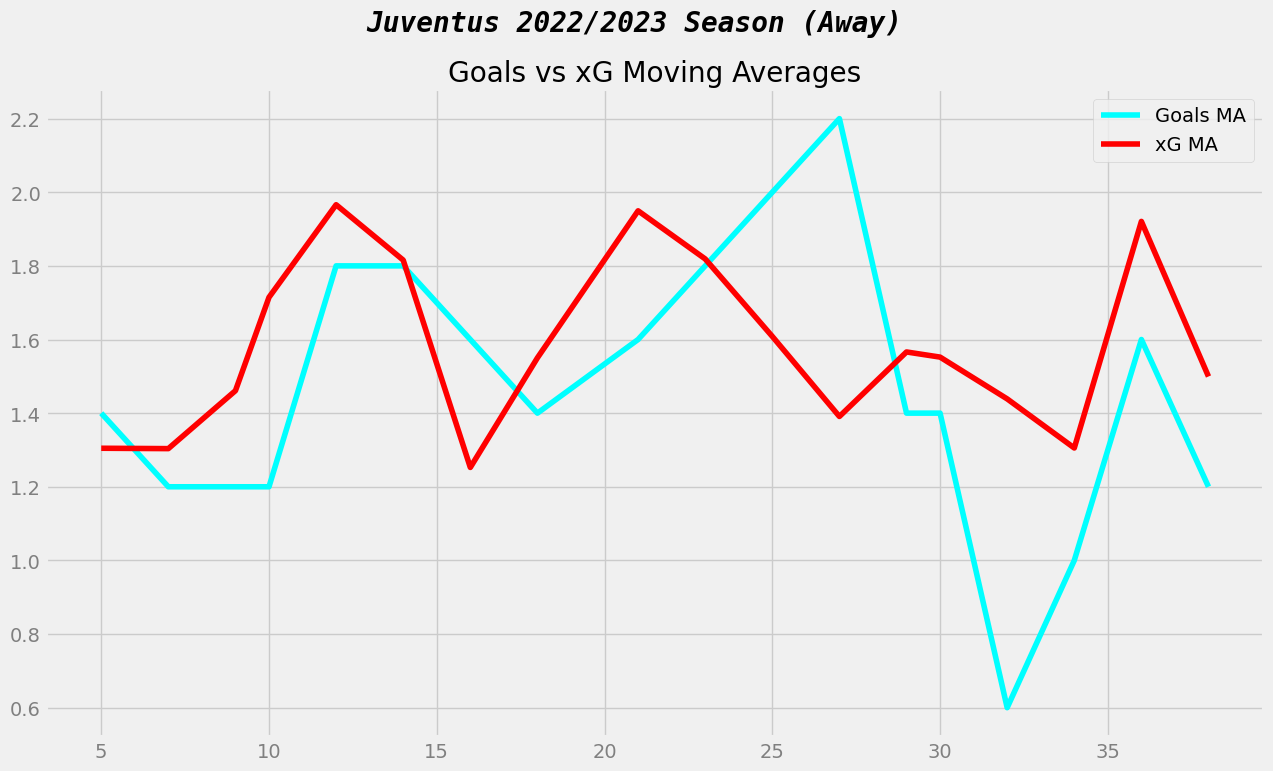

In [208]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df_juventus_a.Match,df_juventus_a.GSMA,label='Goals MA',color='cyan')
ax.plot(df_juventus_a.Match,df_juventus_a.xgSMA,label='xG MA', color='red')
#plotting G and GA
#ax.plot(df_juventus.Match,df_juventus.xG,label='xG',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
#ax.plot(df_juventus.Match,df_juventus.xGA,label='xGA',color='red',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals vs xG Moving Averages')
plt.suptitle('Juventus 2022/2023 Season (Away)', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')